# Baseline Submission

## Imports

In [1]:
import sys
import os

# Get the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the parent directory to the system path
sys.path.append(parent_dir)

from utils import download_competition_data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## The Data

In [3]:
download_competition_data("new-york-city-taxi-fare-prediction")

Checking contents of '/Users/paul/Documents/repos/Kaggle/new-york-city-taxi-fare-prediction/data'... Found: ['test.csv', 'GCP-Coupons-Instructions.rtf', 'train.csv', 'sample_submission.csv']
Data already exists in '/Users/paul/Documents/repos/Kaggle/new-york-city-taxi-fare-prediction/data'. Skipping download.


In [4]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
sample_submission = pd.read_csv("data/sample_submission.csv")   

train.shape, test.shape, sample_submission.shape

((55423856, 8), (9914, 7), (9914, 2))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55423856 entries, 0 to 55423855
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   key                object 
 1   fare_amount        float64
 2   pickup_datetime    object 
 3   pickup_longitude   float64
 4   pickup_latitude    float64
 5   dropoff_longitude  float64
 6   dropoff_latitude   float64
 7   passenger_count    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.3+ GB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                9914 non-null   object 
 1   pickup_datetime    9914 non-null   object 
 2   pickup_longitude   9914 non-null   float64
 3   pickup_latitude    9914 non-null   float64
 4   dropoff_longitude  9914 non-null   float64
 5   dropoff_latitude   9914 non-null   float64
 6   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


In [7]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   key          9914 non-null   object 
 1   fare_amount  9914 non-null   float64
dtypes: float64(1), object(1)
memory usage: 155.0+ KB


## Target Variable: `fare_amount`

In [8]:
train['fare_amount'].min(), train['fare_amount'].max()

(-300.0, 93963.36)

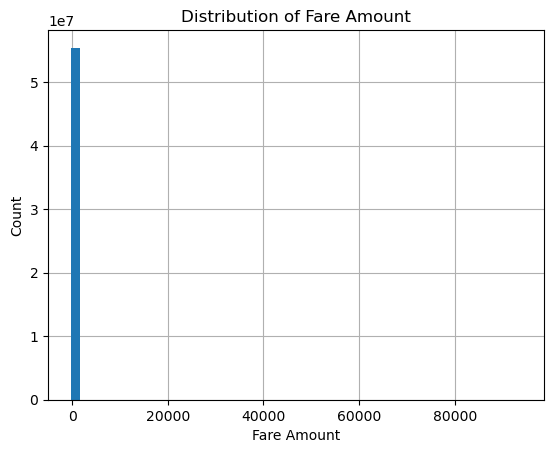

In [9]:
ax = train['fare_amount'].hist(bins=50)  

ax.set_xlabel('Fare Amount')
ax.set_ylabel('Count')
ax.grid(True)
ax.set_axisbelow(True)

plt.title('Distribution of Fare Amount')
plt.show()

In [10]:
len(train[(train['fare_amount'] > 0) & (train['fare_amount'] <= 100)]) / len(train)

0.9995541811453899

- More than 99% of the target variable is in the interval (0, 100]
- Discard the rest

In [11]:
train = train[(train['fare_amount'] > 0) & (train['fare_amount'] <= 100)]
train.shape

(55399147, 8)

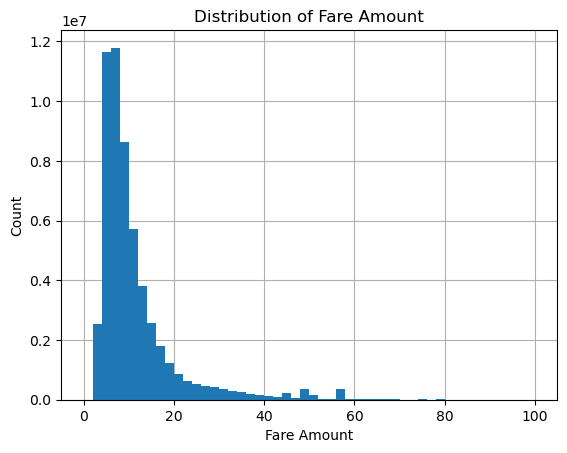

In [12]:
ax = train['fare_amount'].hist(bins=50)  

ax.set_xlabel('Fare Amount')
ax.set_ylabel('Count')
ax.grid(True)
ax.set_axisbelow(True)

plt.title('Distribution of Fare Amount')
plt.show()

## Clean Data

- Remove rows with `null` values

In [13]:
train.shape

(55399147, 8)

In [14]:
train.isnull().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    376
dropoff_latitude     376
passenger_count        0
dtype: int64

In [15]:
train.dropna(axis=0, how='any', inplace=True)

In [16]:
train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
55399147 - train.shape[0]

376

## Build Baseline Model

In [18]:
features = ['pickup_longitude', 'pickup_latitude',
            'dropoff_longitude', 'dropoff_latitude',
            'passenger_count']

X = train[features]
y = train['fare_amount']

In [19]:
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression()

In [20]:
lr_model.coef_, lr_model.intercept_

(array([ 0.00175356, -0.00096544,  0.00259463, -0.00167513,  0.10553916]),
 11.535862204596741)

In [21]:
predictions_manual = ((X * lr_model.coef_).sum(axis=1) + lr_model.intercept_).values
predictions_manual

array([11.21280658, 11.21204113, 11.31761206, ..., 11.2121043 ,
       11.21234669, 11.21205854])

In [22]:
predictions = lr_model.predict(X)
predictions

array([11.21280658, 11.21204113, 11.31761206, ..., 11.2121043 ,
       11.21234669, 11.21205854])

In [23]:
(predictions_manual - predictions).max()

7.105427357601002e-15

## Predictions on Test Set

In [24]:
X_test = test[features]
X_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.973320,40.763805,-73.981430,40.743835,1
1,-73.986862,40.719383,-73.998886,40.739201,1
2,-73.982524,40.751260,-73.979654,40.746139,1
3,-73.981160,40.767807,-73.990448,40.751635,1
4,-73.966046,40.789775,-73.988565,40.744427,1


In [25]:
test_predictions_manual = ((X_test * lr_model.coef_).sum(axis=1) + lr_model.intercept_).values
test_predictions_manual

array([11.2121237 , 11.21210531, 11.21212042, ..., 11.74048288,
       11.73983802, 11.7397284 ])

In [26]:
test_predictions = lr_model.predict(X_test)
test_predictions

array([11.2121237 , 11.21210531, 11.21212042, ..., 11.74048288,
       11.73983802, 11.7397284 ])

In [27]:
(test_predictions_manual - test_predictions).max()

1.7763568394002505e-15

## Prepare Submission

In [28]:
sample_submission.head()

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.35
1,2015-01-27 13:08:24.0000003,11.35
2,2011-10-08 11:53:44.0000002,11.35
3,2012-12-01 21:12:12.0000002,11.35
4,2012-12-01 21:12:12.0000003,11.35


In [29]:
test['fare_amount'] = test_predictions
test_submission = test[['key', 'fare_amount']]
test_submission 

,key,fare_amount
0,2015-01-27 13:08:24.0000002,11.212124
1,2015-01-27 13:08:24.0000003,11.212105
2,2011-10-08 11:53:44.0000002,11.212120
3,2012-12-01 21:12:12.0000002,11.212070
4,2012-12-01 21:12:12.0000003,11.212092
...,...,...
9909,2015-05-10 12:37:51.0000002,11.739802
9910,2015-01-12 17:05:51.0000001,11.739830
9911,2015-04-19 20:44:15.0000001,11.740483
9912,2015-01-31 01:05:19.0000005,11.739838


In [30]:
test_submission.to_csv('submissions/submission_1.csv', index=False)

## Competition Evaluation

$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\hat{y}_i - y_i\right)^2}
$$

- The RMSE on my first submission is 9.40715

In [31]:
# RMSE on training set

y_hat = predictions

rmse = np.sqrt(np.sum((y_hat  - y) ** 2) / len(y))
rmse

9.409086306781512

In [32]:
np.sqrt(mean_squared_error(y, y_hat))

9.409086306781512

## Public and Private Leaderboard `shake-up`

- The difference between public and private leaderboard standings is called a "shake-up"
- The size of the shake-up varies greatly from one competition to another